<a href="https://colab.research.google.com/github/signnd/prak-ml/blob/main/05192022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K Nearest neighbor

In [3]:
import pandas as pd
sensus = {
    'tinggi':[158,170,183,191,155,163,180,158,176],
    'berat':[64,86,84,80,49,59,67,54,67],
    'jk':['pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita']
}
sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,176,67,wanita


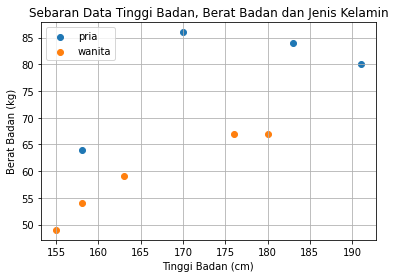

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'],d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

In [5]:
import numpy as np

x_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['jk'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [176  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [7]:
y_train = y_train.flatten()
print(f'y_train:{y_train}')

y_train:[0 0 0 0 1 1 1 1 1]


In [8]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
tinggi_badan = 180
berat_badan = 60
x_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
x_new

array([[180,  60]])

Hasil prediksi

In [25]:
y_new = model.predict(x_new)
y_new

array([1])

In [26]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

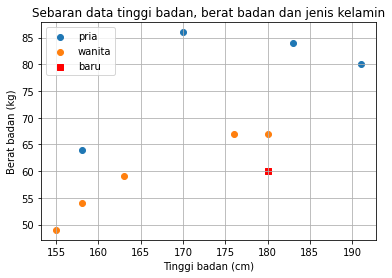

In [27]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan, berat_badan, marker='s', color='red', label='baru')
plt.legend(loc='upper left')
plt.title('Sebaran data tinggi badan, berat badan dan jenis kelamin')
plt.xlabel('Tinggi badan (cm)')
plt.ylabel('Berat badan (kg)')
plt.grid(True)
plt.show()

In [28]:
baru = np.array([tinggi_badan, berat_badan])
baru

array([180,  60])

In [29]:
x_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [176,  67]])

In [30]:
from scipy.spatial.distance import euclidean
data_jarak = [euclidean(baru, d) for d in x_train]
data_jarak

[22.360679774997898,
 27.85677655436824,
 24.186773244895647,
 22.825424421026653,
 27.313000567495326,
 17.029386365926403,
 7.0,
 22.80350850198276,
 8.06225774829855]

In [31]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
6,180,67,wanita,7.000000
8,176,67,wanita,8.062258
5,163,59,wanita,17.029386
0,158,64,pria,22.360680
7,158,54,wanita,22.803509
3,191,80,pria,22.825424
2,183,84,pria,24.186773
4,155,49,wanita,27.313001
1,170,86,pria,27.856777


In [32]:
x_test = np.array([[168,65], [180,96], [160,52],[169,67]])
y_test = lb.transform(np.array(['pria','pria','wanita','wanita'])).flatten()

print(f'x_test:\n{x_test}\n')
print(f'y_test:\n{y_test}')

x_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


In [33]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1])

### Uji Akurasi

In [34]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy:{acc}')

accuracy:0.75


### Presisi

In [35]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'precision: {prec}')

precision: 0.6666666666666666


### Recall

In [36]:
from sklearn.metrics import recall_score
rec = recall_score(y_test, y_pred)
print(f'recall: {rec}')

recall: 1.0


### F1 score

In [37]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'f1_score: {f1}')

f1_score: 0.8


### Confusion matrix

In [38]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

